In [1]:
import pandas as pd
import numpy as np
import random
import seaborn.apionly as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning workflow
![alt text](figs/workflow.png)
(image taken from [here](https://www.kaggle.com/mjbahmani/a-comprehensive-deep-learning-workflow-with-python))

# Task
In this tutorial, we go through an introductory classification problem. It is called MNIST digit classification.

# Data Acquisition
There is a challenge on this dataset on Kaggle [here](https://www.kaggle.com/c/digit-recognizer). You should join the challenge, download the dataset and extract it into `data/`. The dataset is less than 20MB in size. It contains 42K training images and 20K validation images. Each image contains a single handwritten digit and is 28x28 pixels large.

# Loading the data
The data comes in csv format and we use pandas package to read it.

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Let's take a look at the training and test data

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can sample a subset of the table by `sample` function

In [5]:
train.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39798,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23054,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39112,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17935,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6512,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32169,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15347,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28470,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22768,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15378,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('train shape = {}, test shape = {}'.format(train.shape, test.shape))

train shape = (42000, 785), test shape = (28000, 784)


Let's see what column names are there

In [7]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

- What are the feature?
- What is their type/range?
- What is the output represented?

### Is your data clean?
Generally, you might need to look for outliers or errors in the data. Data might have been entered incorrectly or measured incorrectly. Based on the dataset and the data type, you might want to look for different kinds of errors. Some of the most obvious erros could be:
- Missing data
- Data with inconsistent type e.g. string or negative number as pixel value
- Data with value extremely far away from the rest of the data
- Noisy data

We can see some statstics of the data columns

In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


As you saw in the data tables, for training data, the first column is the true label for the image and the rest of the columns show the value of each of 784 (= 28x28) pixels. And for test data, there is just pixel values (the label of images will be predicted by you)

# From tables to features and labels

In this dataset, there is no errors in the data and we can move on. Let's split the table into features and labels for each image.

In [9]:
Y_train = train["label"]
X_train = train.drop(labels="label",axis=1)
X_test = test
print('X_train shape: {}, Y_train sahpe: {}, X_test shape: {}'.format(X_train.shape, Y_train.shape, X_test.shape))
print('X_train type: {}'.format(type(X_train)))

X_train shape: (42000, 784), Y_train sahpe: (42000,), X_test shape: (28000, 784)
X_train type: <class 'pandas.core.frame.DataFrame'>


We will now reshape the pixels to their original 28x28 format (we also change the data format to numpy array)

In [10]:
X_train, Y_train = X_train.values.reshape(-1, 28,28), Y_train.values
X_test = X_test.values.reshape(-1,28,28)
# See how they are shaped now
print('X_train shape: {}, Y_train sahpe: {}, X_test shape: {}'.format(X_train.shape, Y_train.shape, X_test.shape))
print('X_train type: {}'.format(type(X_train)))

X_train shape: (42000, 28, 28), Y_train sahpe: (42000,), X_test shape: (28000, 28, 28)
X_train type: <class 'numpy.ndarray'>


# Visualizing the data

In [11]:
# A function for plotting images in a grid
def plotImages(images, labels=None, nrows=2, ncols=3, shuffle=False):
    i = 0
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            idx = i
            if shuffle:
                idx = random.randint(0, len(images)-1)
            elif i >= len(images):
                break
            ax[row,col].imshow(images[idx], cmap='gray')
            if labels is not None:
                ax[row,col].set_title("True label :{}".format(labels[idx]))
            i += 1

We can see a few images

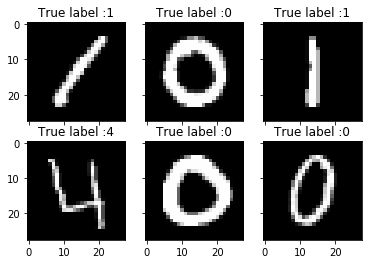

In [12]:
plotImages(X_train, Y_train)

And the frequency of the labels in the dataset

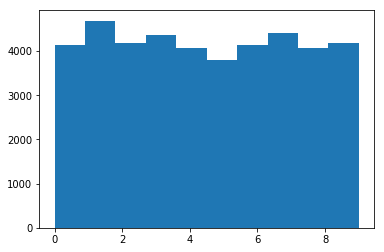

In [13]:
plt.hist(Y_train);

Or in a more fancy way

/Users/saeidnaderi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


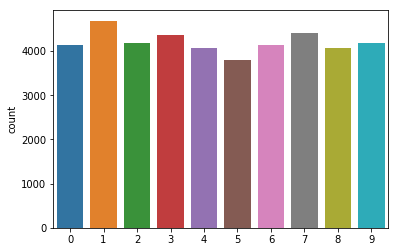

In [14]:
sns.countplot(Y_train);

# Data pre-processing
Based on what model you are going to use, you might need to process your data in some way. Here are some examples:

- If you are using SVM, you need some kind of feature for your samples. Raw pixel values is not useful there (maybe PCA is helpful)
- Does your model put any specific constraint on its inputs? e.g. for some models such as most of neural networks, the input should be in [0,1] and you need to normalize your features
- There might be unuseful or redundant features in the dataset and removing them is quite useful. This is called feature selection.

In [15]:
pca = PCA(n_components=2)
pca.fit(X_train.reshape(-1, 784))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

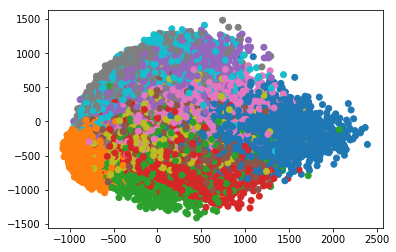

In [16]:
X_PCA = pca.transform(X_train.reshape(-1, 784))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.scatter(X_PCA[:,0], X_PCA[:, 1], color=[colors[i] for i in Y_train])

# Apply learning
Now that we have the data is clean and ready, it's time to think about what model to use and how to train it.

A simple model for classification task is k-nearest neighbors (KNN). This model classifies a test point x based as the mode of k nearest neighbors of x among the training points. So, for training the model, you just store all the training points in the memory but, for training, you need to look into all training points to find the nearest neighbors. Check out [here](http://vision.stanford.edu/teaching/cs231n-demos/knn/) for a simple demo of KNN.

## Validation set and testing the model
**How well good is the trained model?**
Since we do not have true labels for test data, how do we know how good the model will perform on test data? (Note that even if we had the labels, they shouldn't affect the training process in any way. Don't do it! It's cheating!) "Validation set" solves this problem for us. It is nothing but a small portion of training set which we put aside and don't look at while training our model and training will be done on the rest of it.

**Hyper-parameter:**
A question that comes to mind is that what "k" should be? It is called a "hyper-parameter" and most of the models have some hyper-parameters. Another place where we need validation sets is here, to choose hyper=parameters. We train the model with a specific hyper-parameter and then test the performance on the validation set and if it was not satisfactory, we change the hyper-parameter and repeat the process.

**Cross-validation**
A more effective way of testing the model performance is cross-validation. For more information, [here](https://www.cs.cmu.edu/~schneide/tut5/node42.html) and/or whatch [this](https://www.youtube.com/watch?v=sFO2ff-gTh0)

Now that we need a validation set, let's provide ourselves one.

In [17]:
# Randomly permute the dataset
perm = np.random.permutation(len(X_train))
X_train, Y_train = X_train[perm], Y_train[perm]

# Put 2K training samples aside as the validation set remove them from training set
X_valid, Y_valid = X_train[-2000:], Y_train[-2000:]
X_train, Y_train = X_train[:-2000], Y_train[:-2000]

We use scikit-learn for fitting a KNN model to our dataset. scikit-learn is a machine learning package containing a wide variety of models and tools. Check out the list of supervised learning models and tools it has [here](http://scikit-learn.org/stable/supervised_learning.html)

Let's train the model and predict validation set labels.

In [18]:
neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=-1) # n_jobs sets the number of parallel jobs. -1 means max possible.
# KNN expects a feature vector for each sample. We reshape the training data back to the flattened form
neigh.fit(X_train.reshape(-1, 784), Y_train)
Y_pred = neigh.predict(X_valid.reshape(-1, 784))

We can see a few random validation samples and the predicted labels.

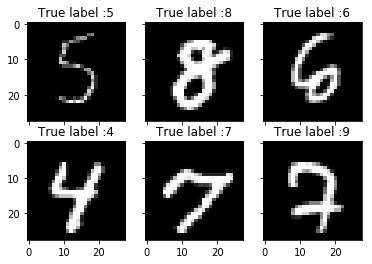

In [19]:
plotImages(X_valid, Y_pred, shuffle=True)

We can also measure the the model accuracy on the validation set i.e. the percentage of the correctly labelled validation samples.

In [20]:
print("KNN accuracy = {}%".format(np.mean(Y_valid == Y_pred)*100))

KNN accuracy = 97.0%


Let's try another k value.

In [21]:
del neigh # delete the previous KNN to free up memory
neigh = KNeighborsClassifier(n_neighbors=3, n_jobs=-1) # n_jobs sets the number of parallel jobs. -1 means max possible.
# KNN expects a feature vector for each sample. We reshape the training data back to the flattened form
neigh.fit(X_train.reshape(-1, 784), Y_train)
Y_pred = neigh.predict(X_valid.reshape(-1, 784))

In [22]:
print("KNN accuracy = {}%".format(np.mean(Y_valid == Y_pred)*100))

KNN accuracy = 97.3%


In [23]:
del neigh # delete the KNN model to free up memory

Here is the workflow again:
![alt text](figs/workflow.png)
Did we missed something?

# How to do "multilabel" classification?

**Excercise**: Apply multiclass SVM from sklearn to this dataset.

NOTES:
- You should apply PCA first
- You can use `LinearSVC` class.
- Google is your friend!

In [24]:
X_PCA = pca.transform(X_train.reshape(-1, 784))
X_PCA_valid = pca.transform(X_valid.reshape(-1,784))
print(X_PCA.shape)
clf = OutputCodeClassifier(LinearSVC(random_state=0),
                           code_size=2, random_state=0)

clf.fit(X_PCA, Y_train)
Y_pred = clf.predict(X_PCA_valid)
print("SVM accuracy = {}%".format(np.mean(Y_valid == Y_pred)*100))

(40000, 2)
SVM accuracy = 12.65%
